In [259]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Get Product Information from Search Page

In [280]:
list_of_asin_id = pd.read_csv('csv_files/final_data.csv',index_col=0)['asin_id'].unique()
print(len(list_of_asin_id))
list_of_asin_id[0:10]

118


array(['B076HK9H7Z', 'B00D7OAOYI', 'B00C0ULS3G', 'B08636S37Z',
       'B00000IVAK', 'B07B7KS87Q', 'B08GD242TJ', 'B01JYVHMVA',
       'B00A2HD40E', 'B088QSDB7S'], dtype=object)

In [257]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
# proxy = {'http':'thomasttam@gmail.com:phaw2colt_ec.LUK@au558.nordvpn.com',
#         'https':'thomasttam@gmail.com:phaw2colt_ec.LUK@au558.nordvpn.com'}

# .get response code
r = requests.get('https://www.amazon.com/dp/B00M085AMI', headers=headers)
content = r.content
soup = BeautifulSoup(content)

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a
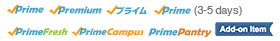
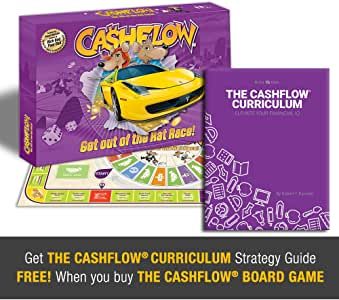

In [258]:
soup

In [263]:
def get_prod_details(asin_no):
    
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    # get response code
    r = requests.get('https://www.amazon.com/dp/'+asin_no, headers=headers)
    content = r.content
    soup = BeautifulSoup(content)

    prod_details = []

    prod_details.append(asin_no)
    
    product_description = soup.select('#productDescription')[0].p.get_text().strip()
#     product_description = soup.find_all('div',attrs={'id':'productDescription'})[0].text.strip()
    prod_details.append(product_description)

    table = soup.find('table', attrs={'class':'a-keyvalue prodDetTable'})

    for line in table.findAll('tr'):

        if line.find('th').text.strip() == 'Product Dimensions' or line.find('th').text.strip() == 'Package Dimensions':
            prod_details.append(line.find('td').text.strip())

        if line.find('th').text.strip() == 'Item Weight':
            prod_details.append(line.find('td').text.strip())

        if line.find('th').text.strip() == 'Manufacturer recommended age':
            prod_details.append(line.find('td').text.strip())

        if line.find('th').text.strip() == 'Manufacturer':
            prod_details.append(line.find('td').text.strip())
            
    return prod_details


In [284]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

# get response code
r = requests.get('https://www.amazon.com/dp/B088QSDB7S',headers=headers)
content = r.content
soup = BeautifulSoup(content)

In [285]:
soup

<!--
        To discuss automated access to Amazon data please contact api-services-support@amazon.com.
        For information about migrating to our APIs refer to our Marketplace APIs at https://developer.amazonservices.com/ref=rm_5_sv, or our Product Advertising API at https://affiliate-program.amazon.com/gp/advertising/api/detail/main.html/ref=rm_5_ac for advertising use cases.
--><!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>Sorry! Something went wrong!</title>
<style>
  html, body {
    padding: 0;
    margin: 0
  }

  img {
    border: 0
  }

  #a {
    background: #232f3e;
    padding: 11px 11px 11px 192px
  }

  #b {
    position: absolute;
    left: 22px;
    top: 12px
  }

  #c {
    position: relative;
    max-width: 800px;
    padding: 0 40px 0 0
  }

  #e, #f {
    height: 35px;
    border: 0;
    font-size: 1em
  }


In [282]:
get_prod_details('B088QSDB7S')

IndexError: list index out of range

In [128]:
# headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

# # get response code
# r = requests.get('https://www.amazon.com/dp/B00D7OAOYI', headers=headers)
# content = r.content
# soup = BeautifulSoup(content)

# prod_details = []

# prod_details.append('B00A2HD40E')

# product_description = soup.find('div',attrs={'id':'productDescription'})
# soup
# # prod_details.append(product_description)

# # table = soup.find('table', attrs={'class':'a-keyvalue prodDetTable'})

# # for line in table.findAll('tr'):

# #     if line.find('th').text.strip() == 'Product Dimensions':
# #         prod_details.append(line.find('td').text.strip())

# #     if line.find('th').text.strip() == 'Item Weight':
# #         prod_details.append(line.find('td').text.strip())

# #     if line.find('th').text.strip() == 'Manufacturer recommended age':
# #         prod_details.append(line.find('td').text.strip())

# #     if line.find('th').text.strip() == 'Manufacturer':
# #         prod_details.append(line.find('td').text.strip())

In [199]:
item_descriptions = []


for asin_id in list_of_asin_id:
    try:
        item_descriptions.append(get_prod_details(asin_id))
    except:
        pass

In [200]:
item_details = pd.DataFrame(item_descriptions).rename({0:'asin_id',
                                                      1:'product_description',
                                                      2: 'product_dimensions',
                                                      3: 'item_weight',
                                                      4: 'recommender_age',
                                                      5: 'manufacturer'},axis=1)

In [201]:
item_details

,asin_id,product_description,product_dimensions,item_weight,recommender_age,manufacturer
0,B076HK9H7Z,"Style:classic\n\n\nSlide, collide and score to...",1.61 x 10.51 x 10.51 inches,1 pounds,6 years and up,Hasbro
1,B00D7OAOYI,"Product Description\nPop into the racing, chas...",1.61 x 10.51 x 10.51 inches,11.2 ounces,5 - 15 years,Hasbro
2,B00C0ULS3G,Product Description\nThis Battleship board gam...,2.87 x 10.51 x 10.51 inches,1.6 pounds,7 years and up,Hasbro
3,B08636S37Z,Disney’s beloved The Haunted Mansion comes to ...,2.5 x 10.5 x 10.5 inches,2.58 pounds,6 years and up,Funko
4,B00000IVAK,"Product Description\nIt's fun, it's challengin...",8.08 x 2.18 x 10.38 inches,7 ounces,7 years and up,Jax Ltd Inc
5,B07B7KS87Q,In The Game of Life game players choose a path...,1.63 x 15.75 x 10.5 inches,2 pounds,8 years and up,Hasbro
6,B08GD242TJ,Bring back childhood memories and introduce “t...,1.61 x 12.01 x 10.51 inches,1.35 pounds,6 years and up,Hasbro
7,B01JYVHMVA,Style:Classic Clue\n\n\nOne murder… 6 suspects...,1.61 x 10.51 x 10.51 inches,1 pounds,8 years and up,Hasbro
8,B00A2HD40E,Product Description\nFour diseases have broken...,12 x 8.6 x 1.7 inches,2.3 pounds,13 - 15 years,Publisher Services Inc (PSI)
9,B088QSDB7S,Gloomhaven Jaws of the Lion is a fully stand a...,11.5 x 9.1 x 4.5 inches,6.34 pounds,14 years and up,Cepholafair Games


# Save as csv file

In [202]:
item_details.to_csv('csv_files/item_details.csv')

# Data Cleaning

In [249]:
item_details = pd.read_csv('csv_files/item_details.csv',index_col=0)

In [250]:
item_details['product_description'] = item_details['product_description'].apply(lambda x: x
                                                                                .replace('\n',''))
#                                                                                 .replace('Product Description','')
#                                                                                 .replace('Style:Classic','')
#                                                                                 .replace('Style:Single','')
#                                                                                 .replace('Style:Standard',''))

In [251]:
item_details.head()

,asin_id,product_description,product_dimensions,item_weight,recommender_age,manufacturer
0,B076HK9H7Z,"Style:classicSlide, collide and score to win t...",1.61 x 10.51 x 10.51 inches,1 pounds,6 years and up,Hasbro
1,B00D7OAOYI,"Product DescriptionPop into the racing, chasin...",1.61 x 10.51 x 10.51 inches,11.2 ounces,5 - 15 years,Hasbro
2,B00C0ULS3G,Product DescriptionThis Battleship board game ...,2.87 x 10.51 x 10.51 inches,1.6 pounds,7 years and up,Hasbro
3,B08636S37Z,Disney’s beloved The Haunted Mansion comes to ...,2.5 x 10.5 x 10.5 inches,2.58 pounds,6 years and up,Funko
4,B00000IVAK,"Product DescriptionIt's fun, it's challenging,...",8.08 x 2.18 x 10.38 inches,7 ounces,7 years and up,Jax Ltd Inc


In [252]:
pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows', None)

In [253]:
item_details = item_details.drop([54,59,65,70,91]).reset_index(drop=True)
item_details.head()

,asin_id,product_description,product_dimensions,item_weight,recommender_age,manufacturer
0,B076HK9H7Z,"Style:classicSlide, collide and score to win t...",1.61 x 10.51 x 10.51 inches,1 pounds,6 years and up,Hasbro
1,B00D7OAOYI,"Product DescriptionPop into the racing, chasin...",1.61 x 10.51 x 10.51 inches,11.2 ounces,5 - 15 years,Hasbro
2,B00C0ULS3G,Product DescriptionThis Battleship board game ...,2.87 x 10.51 x 10.51 inches,1.6 pounds,7 years and up,Hasbro
3,B08636S37Z,Disney’s beloved The Haunted Mansion comes to ...,2.5 x 10.5 x 10.5 inches,2.58 pounds,6 years and up,Funko
4,B00000IVAK,"Product DescriptionIt's fun, it's challenging,...",8.08 x 2.18 x 10.38 inches,7 ounces,7 years and up,Jax Ltd Inc


In [254]:
item_details['item_weight'] = item_details['item_weight'].apply(lambda x: float(x[:-7]) * 16 if 'pounds' in x else float(x[:-7]))

In [255]:
item_details.head()

,asin_id,product_description,product_dimensions,item_weight,recommender_age,manufacturer
0,B076HK9H7Z,"Style:classicSlide, collide and score to win t...",1.61 x 10.51 x 10.51 inches,16.00,6 years and up,Hasbro
1,B00D7OAOYI,"Product DescriptionPop into the racing, chasin...",1.61 x 10.51 x 10.51 inches,11.20,5 - 15 years,Hasbro
2,B00C0ULS3G,Product DescriptionThis Battleship board game ...,2.87 x 10.51 x 10.51 inches,25.60,7 years and up,Hasbro
3,B08636S37Z,Disney’s beloved The Haunted Mansion comes to ...,2.5 x 10.5 x 10.5 inches,41.28,6 years and up,Funko
4,B00000IVAK,"Product DescriptionIt's fun, it's challenging,...",8.08 x 2.18 x 10.38 inches,7.00,7 years and up,Jax Ltd Inc


In [98]:
# item_details['item_weight'] = item_details['item_weight'].apply(lambda x: x[:-13] if ('years and up' in x) else x[:-7]).astype('float')